<a href="https://colab.research.google.com/github/MateuszP137/EEML-CW/blob/main/03_ML_NLFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-linear Feature Transformation


---


The essesne of any linear model is to calculate the signal given by:

$$
\mathbf{w}^\intercal \mathbf{x} = \sum_{i=0}^{d} w_i x_i
$$

as the output of the hypothesis. This formula's linearity is evident not only in $x_i$ but also in the weight parameters $w_i$. A closer examination of the learning algorithms tied to this formula reveals that the linear nature in the weights $\mathbf{w}$ is the driving force behind these algorithms as the inputs $\mathbf{x}$ are considered constants from the algorithm's perspective. This insight underscores the possibility of introducing nonlinear variations into the input $\mathbf{x}$ while still adhering to the analytical framework of linear models.



# Classification


As not all data are linearly seperable, in fact the majority of real world problem are concerned with non-linearly seperable data. This trick is used to utilise linear models while still having non-linearly seperable data by transforming the features such that the newly transformed features are linearly seperable. This newly transformed data set—which is now linearly separable—is used as the new data set. For that purpose we can define the $\mathcal Z$-space which is the space that the transformed data belong to. Non-linear transformations can be used to transform data such that it becomes linearly separable given original data $\mathrm {x}_n \in \mathcal X$, we transform the data using $\mathrm {z}_i = \Phi (\mathrm {x}_i) \in \mathcal Z$, then separate data in the $\mathcal Z$ $\tilde {g} (\mathrm {z}) = \text {sign} (\tilde {w}^{\mathrm {T}} \mathrm {z})$, and finally classify in $\mathcal X$ such that $g(\mathrm {x}) = \tilde {g} (\Phi (\mathrm {x})) = \text {sign} (\tilde {w}^{\mathrm {T}} \Phi (\mathrm {x}))$. This process is summarised below:


$$
\begin{align}
\mathrm {x} = (x_0, x_1, \dots, x_d)\ &\xrightarrow{\Phi}\ \mathrm {z} = (z_0, z_1, \dots \dots, z_{\tilde d}) \\
\mathrm { x_1, x_2, \dots, x_n}\      &\xrightarrow{\Phi}\ \mathrm {z_1, z_2, \dots, z_n } \\
\mathrm { y_1, y_2, \dots, y_n}\      &\xrightarrow{\Phi}\ \mathrm {y_1, y_2, \dots, y_n } \\
\text {no weights in}\ \mathcal {X}\  &\phantom {\xrightarrow{\Phi}\ } \mathrm {\tilde {w}} = (w_0, w_1, \dots \dots, w_{\tilde {d}}) \\
g(\mathrm {x}) = \text {sign} (\mathrm {\tilde {w}^T z}) &= \text {sign} (\mathrm {\tilde {w}^T \Phi (x)})
\end{align}
$$


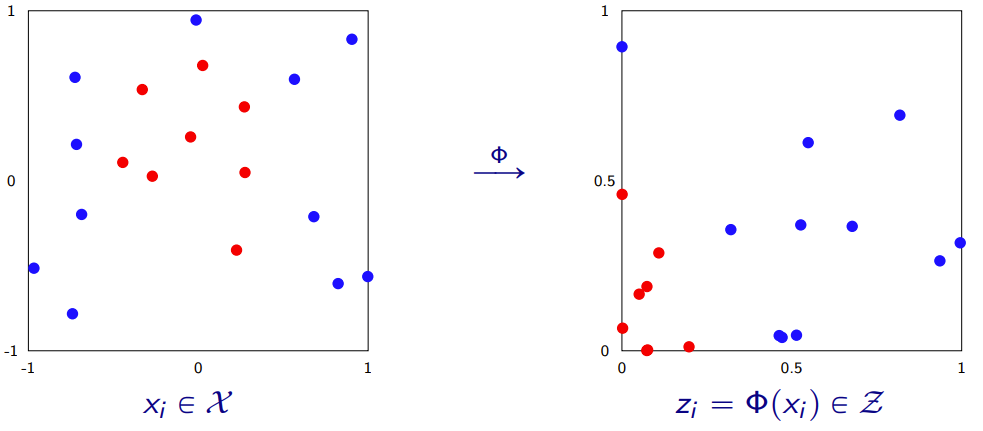

In the upcoming code cell, a piece of code is given that will generate a dummy non-linearly separable data for us. We will then use the Perceptron Learning Algorithm (PLA) that we learned about in the first exercise to classify this newly generated data. To make things more convenient for you, the code for the PLA is provided right below.

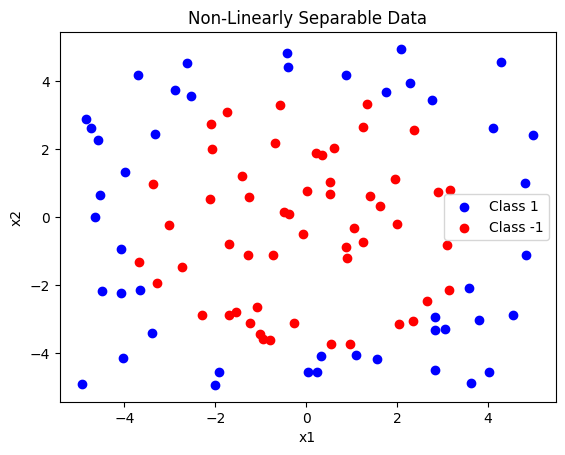

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def generate_non_linearly_separable_data(num_samples, random_seed=32):
    # Set the random seed for consistent data generation
    np.random.seed(random_seed)
    # Generate random data points for x1 and x2 in the range [-5, 5]
    x1 = np.random.uniform(-5, 5, num_samples)
    x2 = np.random.uniform(-5, 5, num_samples)

    # Assign labels such that the data points are not linearly separable
    labels = np.where(x1**2 + x2**2 >= 16, 1, -1)

    return x1, x2, labels

def plot_data(x1, x2, labels, title):
    # Plot the data points with different colors for each class
    plt.scatter(x1[labels==1], x2[labels==1], c='b', marker='o', label='Class 1')
    plt.scatter(x1[labels==-1], x2[labels==-1], c='r', marker='o', label='Class -1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title(title)
    plt.show()

num_samples_per_class = 50  # Half of the samples for each class
x1, x2, labels = generate_non_linearly_separable_data(num_samples_per_class * 2)

# Stack the data in one numpy array to distinguish them from the tranformed data later on

X_original = np.column_stack((x1, x2))

# Plot non-linearly separable data
plot_data(x1, x2, labels, 'Non-Linearly Separable Data')

In [9]:
# PLA code below

def predict(W, X):
        """ Return class label after each setp """
        return np.where(net_input(W, X) >= 0.0, 1, -1)

def net_input(W, X):
        """ Calculate net input """
        return np.dot(X, W[1:]) + W[0]

def plot_boundary(W, X, y, col1 = 0, col2 = 1):
    """Function to plot the boundary defined by the weights. Given equation."""
    """w0 + w1*x1 + w2*x2 = 0, used to generate the line."""

    # Calculate the slope and y-intercept of the boundary line
    slope = -W[col1 + 1] / W[col2 + 1]
    intercept = -W[0] / W[col2 + 1]

    # Get the minimum and maximum x values from the dataset
    x_min = np.min(X[:, col1])
    x_max = np.max(X[:, col1])

    # Generate points for the boundary line to cover the whole plot
    x_vals = np.array([x_min, x_max])
    y_vals = slope * x_vals + intercept

    # This part here define the x-axis and y-axis style according to the data we are using
    plt.scatter(X[y==1, col1], X[y==1, col2], c='b', marker='o', label='Class 1')
    plt.scatter(X[y==-1, col1], X[y==-1, col2], c='r', marker='o', label='Class -1')
    plt.xlabel(f'x{col1 + 1}')
    plt.ylabel(f'x{col2 + 1}')
    plt.legend()
    plt.title('title')

    # Plot the line using the calculated points
    plt.plot(x_vals, y_vals, 'black')

    plt.show()

def plot_errors(error):
    plt.plot(range(1, len(error) + 1), error,marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Number of misclassifications')
    # Set the x-axis ticks to display only integer values
    # Set the x-axis ticks to be automatically determined based on available space
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

def pla(n_iter, X, y, plot_iter = 1, cols_to_plot=None):
        first_0_e = -1
        if cols_to_plot is None:
            cols_to_plot = [[1, 2]]
        W = np.zeros(1 + X.shape[1])
        errors_ = []
        for i in range(n_iter):
            for j, (xi, target) in enumerate(zip(X,y)):
         #     update = target - predict(W, xi)
         #     W += 0.5*update*np.append(1,xi)
              if predict(W, xi) != target:
                  W = W + target * np.append(1,xi)
            # errors on whole dataset
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -------------------------------------------
            if errors == 0:
                if first_0_e == -1:
                    print(f"First iteration with error 0 is: {i}")
                    first_0_e = i
            errors_.append(errors)
            i += 1
            if i % plot_iter == 0 or i == 1:
                print ("Iteration: ", i)
                print("Weights: ", W)
                print("Misclassified Samples: ", errors)
                for i in cols_to_plot:
                    plot_boundary(W,X,y, col1=i[0], col2=i[1])  #When weights are updated we plot the boundary

        plot_errors(errors_)

## Task 1 [40 marks]

1. **Data Transformation Function:** Write a function to transform the provided data while retaining its original feature space dimensions. The objective is to get linearly separable data through this transformation. The resulting transformed data, represented as `x1_transformed` and `x2_transformed` can then be merged into a single NumPy array, serving as input for the pla function as we did with the original data.

2. **Visualisation and Execution:** Generate a plot that visually demonstrates the linear separability achieved by the transformed data. Execute the Perceptron Learning Algorithm (`pla`) using this transformed data. Present the following outcomes:
  - Final classifier weights.
  - Visualisation of the decision boundary.
  - Display of correctly classified samples.
  - Identification of the iteration at which the PLA achieved perfect classification.

Iteration:  1
Weights:  [-22.           9.68986956   7.76022622   3.50229694 -14.20088495
   5.56430614]
Misclassified Samples:  37


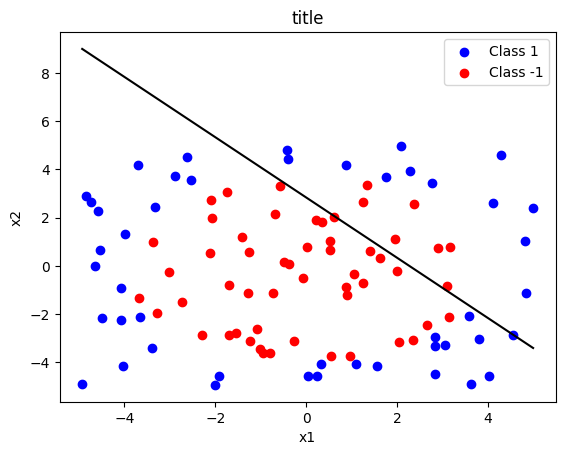

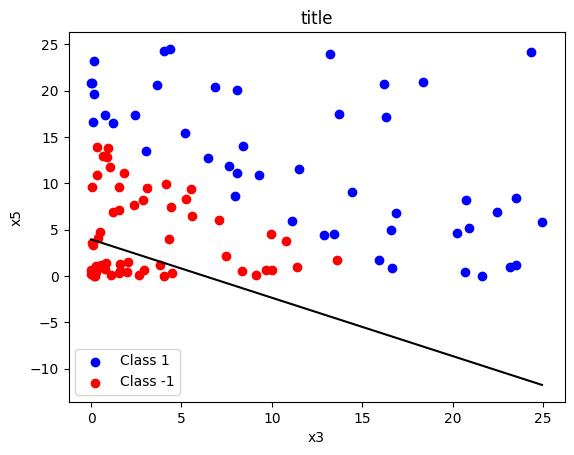

Iteration:  40
Weights:  [-265.           11.83194074   15.44603233   15.50538185   -7.73877285
   31.18405093]
Misclassified Samples:  18


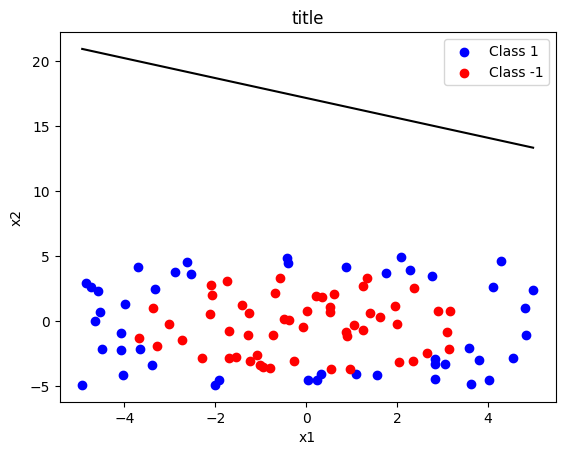

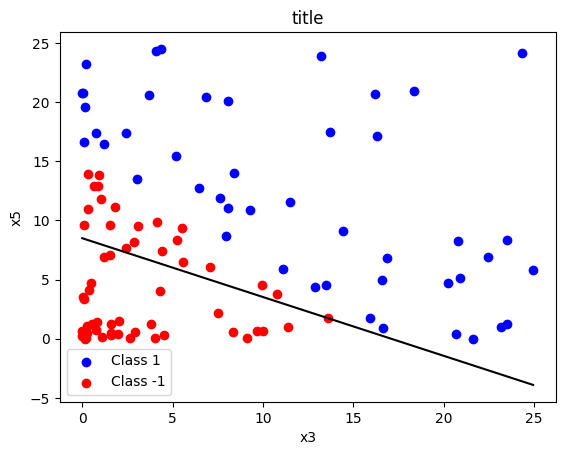

Iteration:  80
Weights:  [-357.            6.17987679   11.24875365   20.05864269    7.02366978
   27.54683993]
Misclassified Samples:  7


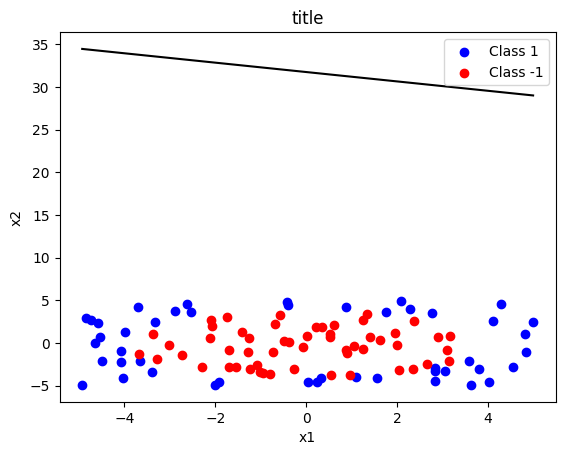

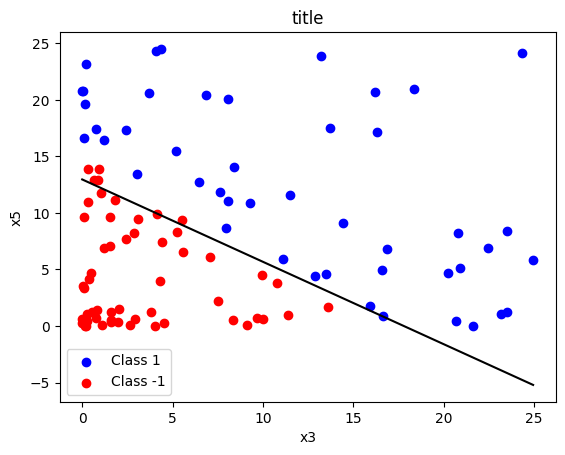

Iteration:  120
Weights:  [-427.            9.91636414   13.54040746   15.81308115    2.62903321
   35.48826921]
Misclassified Samples:  13


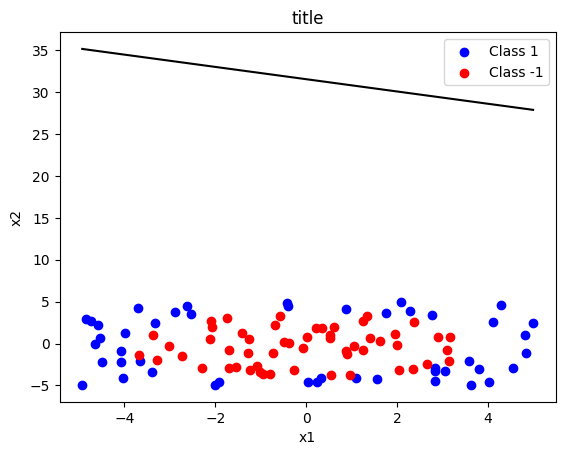

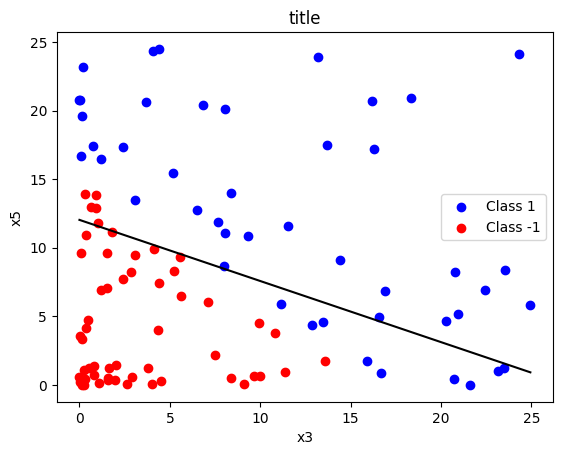

Iteration:  160
Weights:  [-478.           16.06325621   13.66194602   29.23325424    6.22739954
   36.8274096 ]
Misclassified Samples:  6


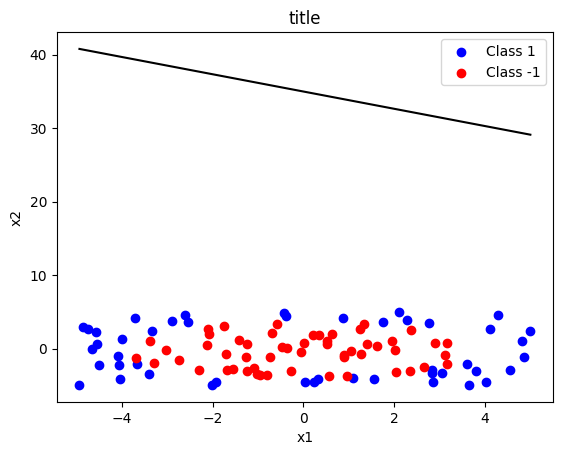

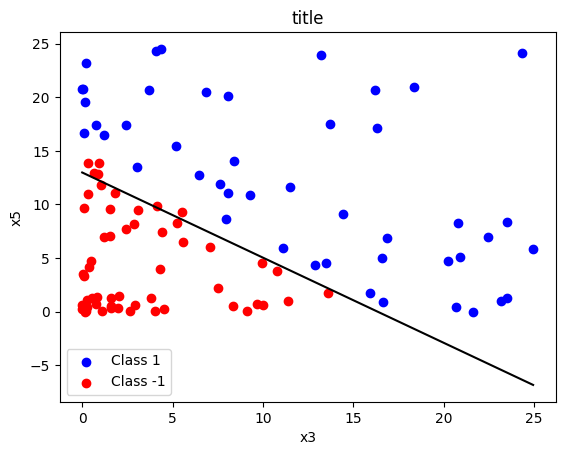

First iteration with error 0 is: 197
Iteration:  200
Weights:  [-514.           11.67053785   10.55532622   34.17674412    2.95398172
   33.37337935]
Misclassified Samples:  0


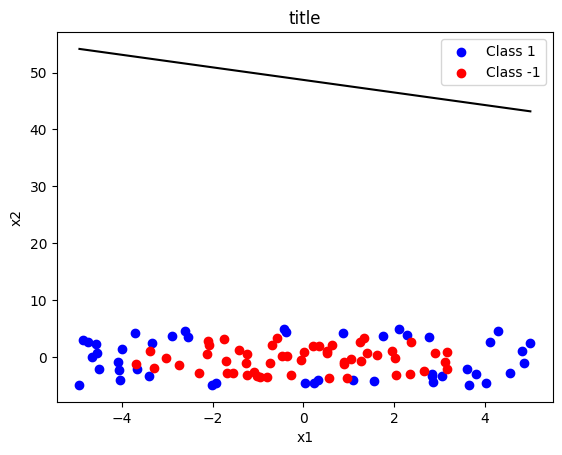

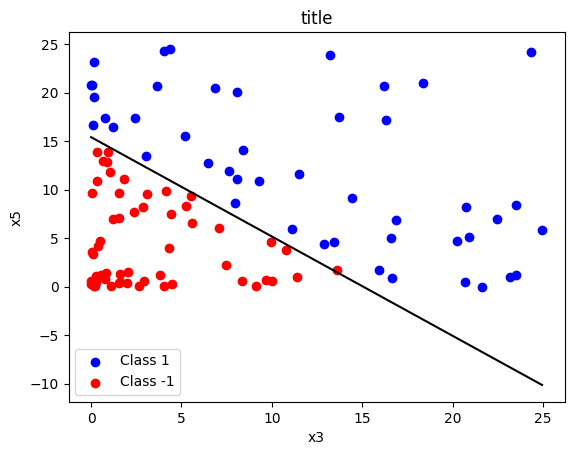

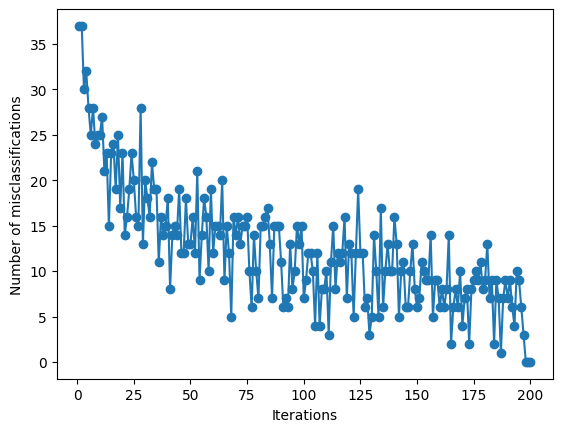

In [10]:
# Task 1
X_original = np.column_stack((x1, x2))

# New parameters: x1^2, x1x2, x2^2

X_new_1 = np.multiply(X_original[:,0], X_original[:,0])
X_new_2 = np.multiply(X_original[:,0], X_original[:,1])
X_new_3 = np.multiply(X_original[:,1], X_original[:,1])

X_new = np.column_stack((X_original, X_new_1, X_new_2, X_new_3))

N_ITERS = 200
N_GRAPHS = 5

pla(N_ITERS, X_new, labels, N_ITERS // N_GRAPHS, cols_to_plot = [[0, 1], [2, 4]])

Error count: 0


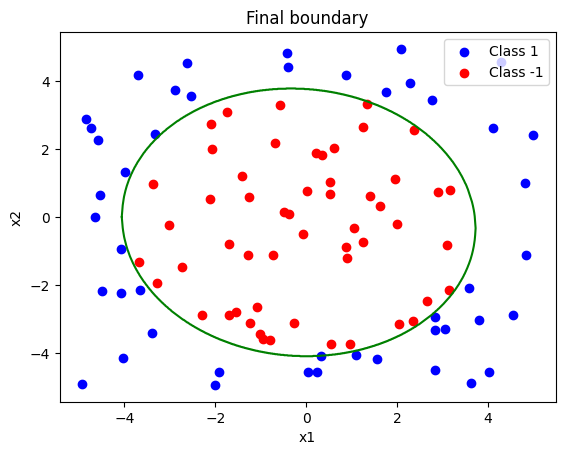

In [5]:
# Task 1 (continued)

W = [-514, 11.67053785, 10.55532622, 34.17674412, 2.95398172, 33.37337935]

errors = 0
for j, (xi, target) in enumerate(zip(X_new, labels)):
    if predict(W, xi) != target:
        errors += 1

print("Error count:", errors) # To verify correct weights being used

def plot_data(x1, x2, labels, title):
    # Plot the data points with different colors for each class
    plt.scatter(x1[labels==1], x2[labels==1], c='b', marker='o', label='Class 1')
    plt.scatter(x1[labels==-1], x2[labels==-1], c='r', marker='o', label='Class -1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title(title)

plot_data(X_new[:,0], X_new[:,1], labels, "Final boundary")

boundary_final_x = []
boundary_final_y = []
RES = 1000
boundary_x = list(np.linspace(-5, 5, RES))
boundary_y1 = list(np.linspace(0, 5, RES // 2))
boundary_y2 = list(np.linspace(0, -5, RES // 2 ))

THRESHOLD = 2

def apply_w(x1, x2, w):
    x = [1, x1, x2, x1 * x1, x1 * x2, x2 * x2]
    return sum([i * j for i, j in zip(w, x)])

for i in boundary_x:
    min = THRESHOLD + 0.01
    min_y = 0
    for j in boundary_y1:
        cur = apply_w(i, j, W)
        if cur < min:
            min = abs(cur)
            min_y = j
        elif min < THRESHOLD:
          break
    if min < THRESHOLD:
        boundary_final_x.append(i)
        boundary_final_y.append(min_y)


for i in reversed(boundary_x):
    min = THRESHOLD + 0.01
    min_y = 0
    for j in boundary_y2:
        cur = apply_w(i, j, W)
        if cur < min:
            min = abs(cur)
            min_y = j
        elif min < THRESHOLD:
          break
    if min < THRESHOLD:
        boundary_final_x.append(i)
        boundary_final_y.append(min_y)

plt.plot(boundary_final_x, boundary_final_y, c='g', marker='', label='Boundary')


plt.show()





# Regression

Linear regression serves as a valuable tool for examining the intrinsic linear relationship between a dependent variable $\mathbf{y}$ and one or more independent variables  $\mathbf{X}$. This fundamental connection forms the basis of the model, yet it's essential to acknowledge that this assumption of linearity underpins the analysis. However, real-world data frequently showcases intricate nonlinear behaviors that cannot be captured by a purely linear model. Here's where non-linear feature transformation for regression (e.g polynomial transformation) enters the scene, extending the capabilities of the linear model. By introducing polynomial terms, we empower the model to recognise non-linear patterns, opening a pathway to more accurately represent complex relationships within the data.

Polynomial tranfomration works by supplementing the model with extra predictors. Each of these predictors emerges from the original variables raised to specific powers. For instance, in quadratic (degree 2) polynomial transfomration for single variable $x_1$, we generate one additional variable (we can also include a bias term): 1, and $x_1^2$. For two independent variables the transfomration (including bias):


$$
 \mathbf x = (1, x_1, x_2)\ \xrightarrow{\Phi}\ \mathbf z = (1, x_1, x_2, x_1 x_2, x_1^2, x_2^2)
$$

and so on.

This technique provides a streamlined mechanism to embrace non-linear trends in data while retaining the framework of linear models. Below is a visual example of how changing the degrees will change the prediction curve with respect to the original data for a single independent variable where the top-left graph is the linear fit of degree 1:

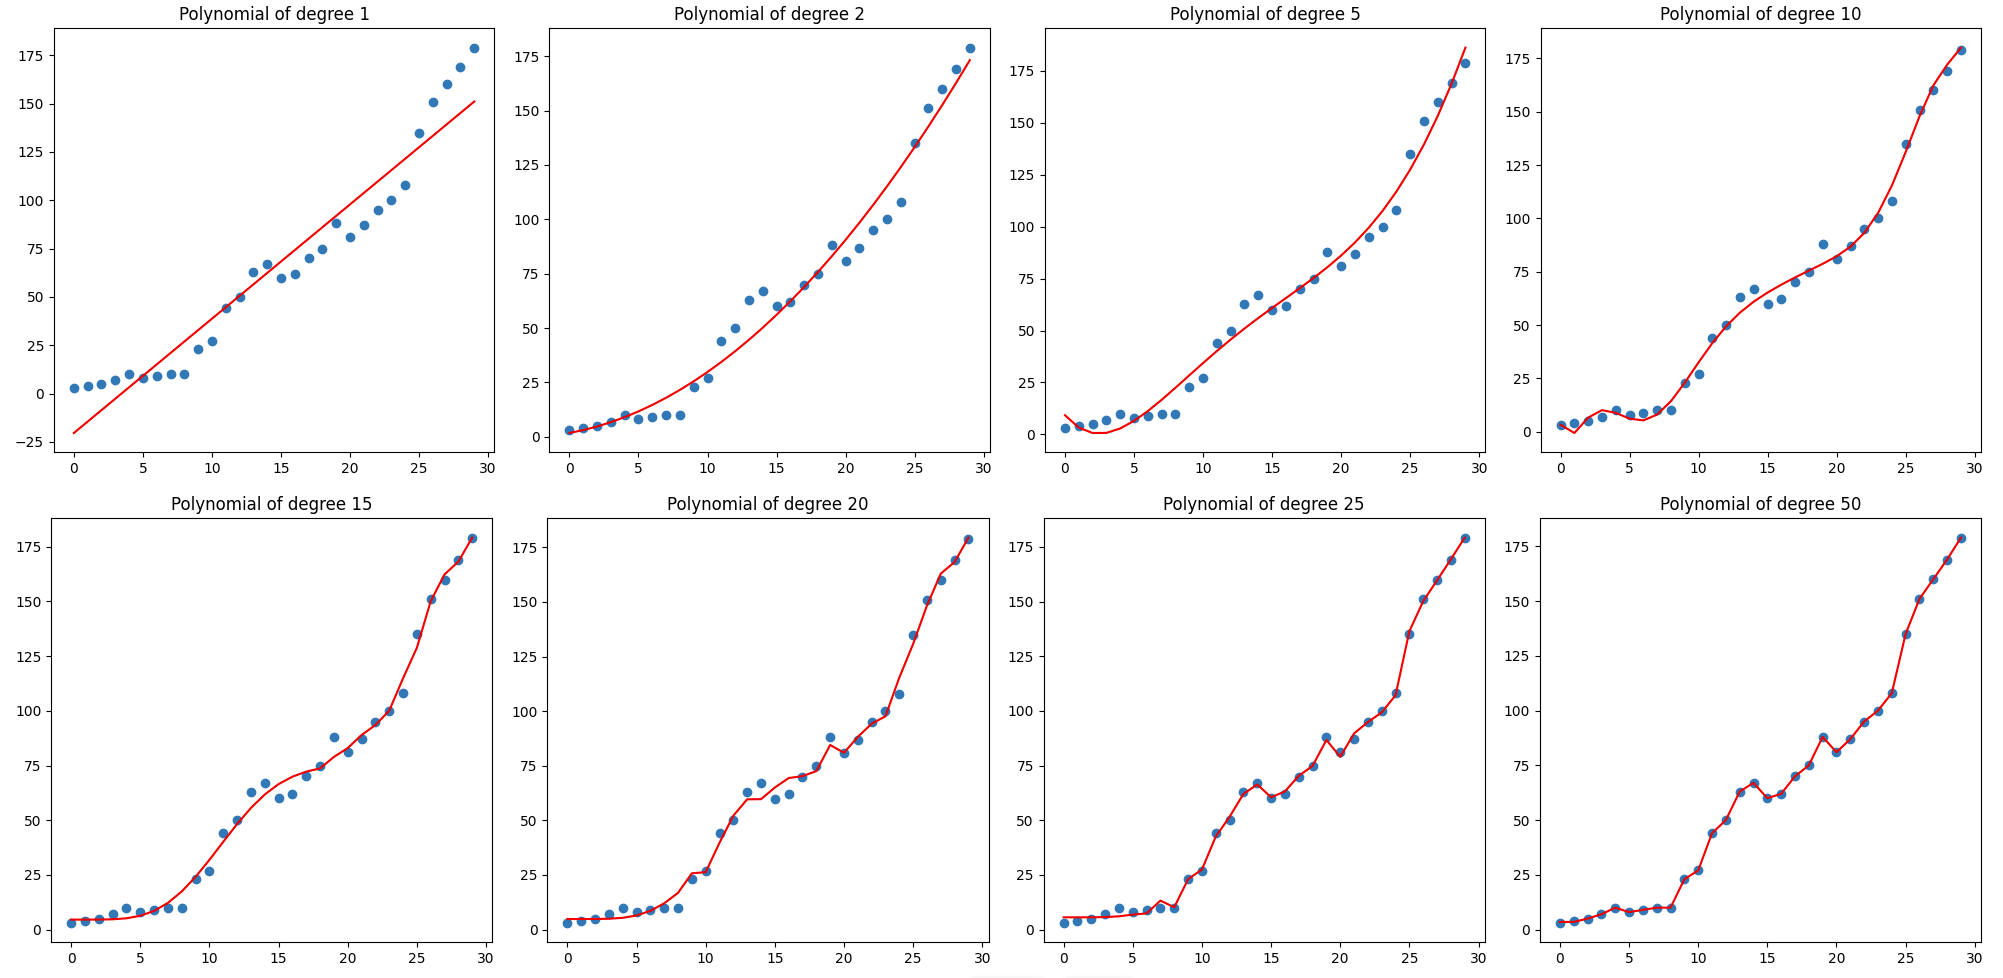

In the upcoming code cell, a piece of code is given that will generate a dummy data for regression.


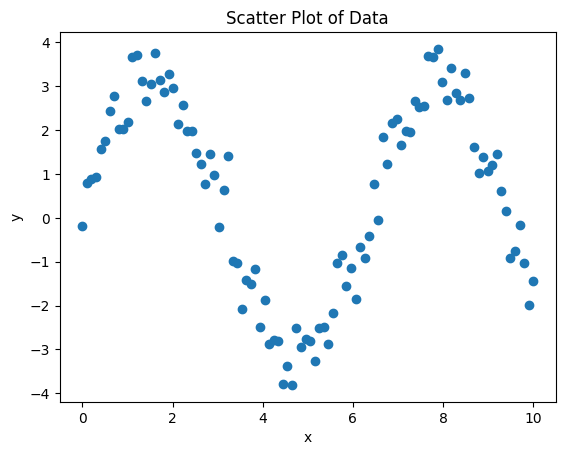

In [6]:
np.random.seed(32)  # Set a seed for reproducibility

# Generate data points with a sine-like pattern and noise
x = np.linspace(0, 10, 100)
y = 3 * np.sin(x) + np.random.normal(0, 0.5, 100)

# Plot the data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Data')
plt.show()

## Task 2 [60 marks]

You are required to create a function(s) that takes a single-variable input `x` and generates a polynomial transformation of a specified degree `d`. The function should provide the option to include a bias term or not, controlled by the logical parameter `include_bias`. You will then use the tranformed data to train linear regression model and get the MSE for each case.

**1. Function Description:**

- Accepts the input variable `x`.
- Accepts the polynomial degree `d`.
- Accepts the logical parameter `include_bias` (either `True` or `False`).
- Generates a polynomial transformation of degree `d` based on the value of `include_bias`. If `include_bias` is `True`, the transformation includes the bias term `1` as the first component. Otherwise, the transformation starts directly from `x^1`.
- Returns the polynomial transformation as a vector `z`.
-For instance, if you choose `d=5` and `include_bias=True`, the generated output will be `z = [1, x, x^2, x^3, x^4, x^5]`. On the other hand, if `include_bias=False`, the generated output will be `z = [x, x^2, x^3, x^4, x^5]`.

**3. Training Linear Regression Model:**
  - Use the provided degrees `[1, 3, 5, 7, 9, 11, 13, 15]`.
  - For each degree in the list, apply the polynomial transformation to the input data `x`.
  - Train a linear regression model using the transformed data and the original `y` data.
  - Visualise the results by plotting the original data points and the predicted values from the linear regression model. Each plot should correspond to a specific polynomial degree (you can use the figure with the eight plots in the description as a reference of how your visulisation should be).
  - Additionally, calculate the Mean Squared Error (MSE) for each degree transformation and display it above the corresponding plot.



> In this task you are allowed to use scikit-learn library to fit the linear regression model and for calculating the MSE. However, you are expected to create your own user-defined function for generating the polynomial data as usual. Below are the corresponding commands that you can import:
- `from sklearn.linear_model import LinearRegression`
- `from sklearn.metrics import mean_squared_error`



In [7]:
# Task 2
def extend_input_to_polynomial(x, d, include_bias):

    cur_col = x.copy()
    x = np.reshape(x, (-1, 1))

    for i in range(2, d + 1, 1):
        cur_col = np.multiply(cur_col, x[:,0])
        x = np.column_stack((x, cur_col))

    if include_bias:
        x = np.column_stack((np.ones(x.shape[0]), cur_col))

    return x


Polynomial 1: Weights: [ 0.93267176 -0.07264987], MSE: 4.6354620451093265


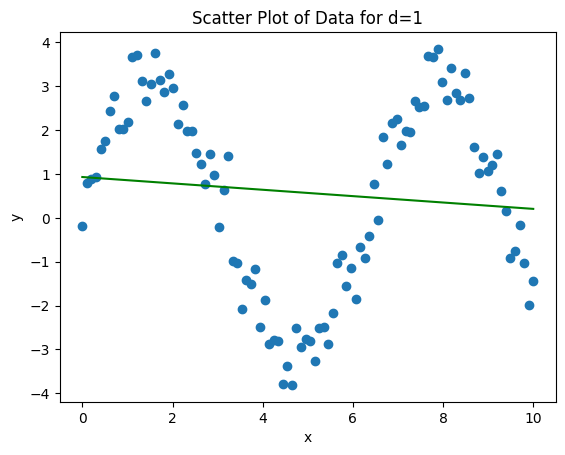

Polynomial 3: Weights: [ 4.22707815 -2.89083047  0.5265634  -0.02710328], MSE: 3.5245959600314207


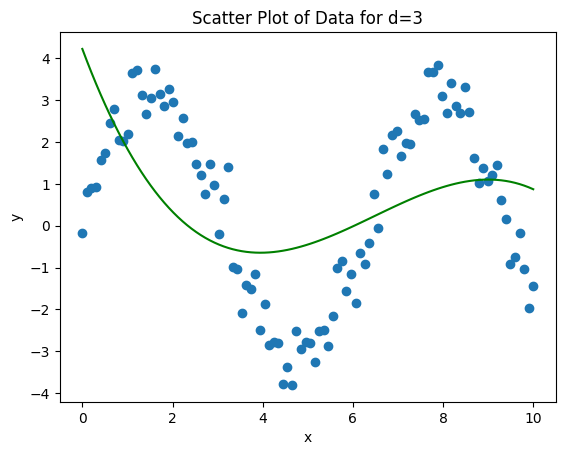

Polynomial 5: Weights: [-1.24018624e+00  9.48573748e+00 -5.78991571e+00  1.17040761e+00
 -9.15878754e-02  2.27882365e-03], MSE: 0.5068049865669368


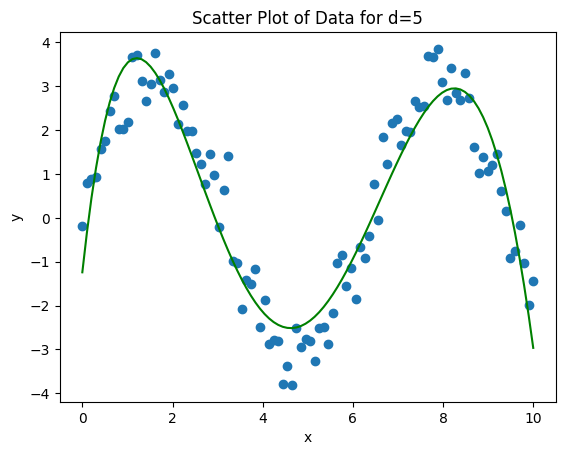

Polynomial 7: Weights: [ 2.34328067e-01  2.65803877e+00  1.17303590e+00 -1.60636115e+00
  4.18518201e-01 -4.03523868e-02  1.18668381e-03  1.24185318e-05], MSE: 0.24193060616092046


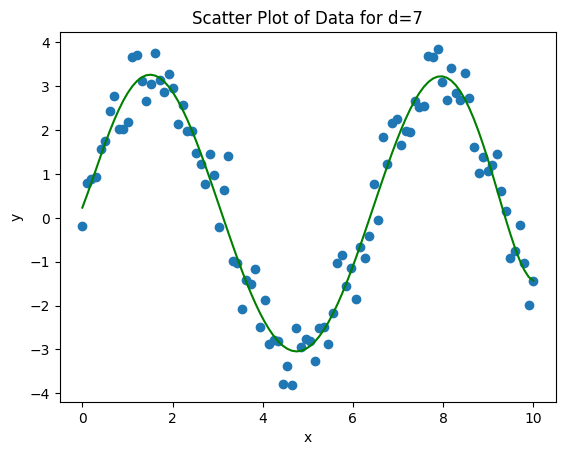

Polynomial 9: Weights: [ 3.42186789e-02  4.42132460e+00 -2.12750848e+00  9.15756393e-01
 -5.61947643e-01  1.72157813e-01 -2.51002947e-02  1.79702545e-03
 -5.75937277e-05  5.44240002e-07], MSE: 0.2374449173240248


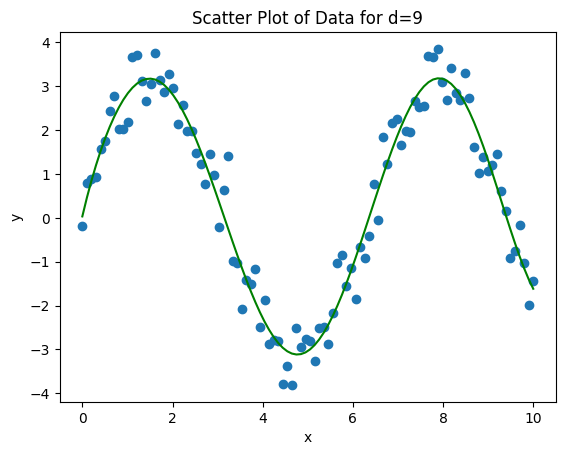

Polynomial 11: Weights: [ 3.84951878e-02  4.09938486e+00 -4.28220436e-01 -2.21610667e+00
  2.26461494e+00 -1.27785846e+00  4.30885146e-01 -8.92048439e-02
  1.15063449e-02 -9.05680397e-04  3.99141965e-05 -7.55769006e-07], MSE: 0.23640477801723797


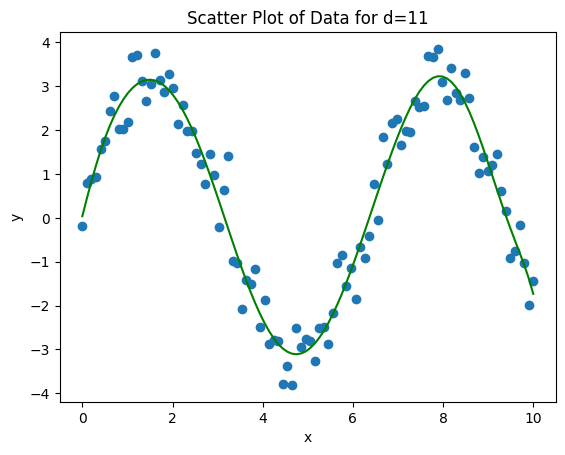

Polynomial 13: Weights: [-1.46476276e-01  1.01203292e+01 -3.08839623e+01  6.00904732e+01
 -6.53045812e+01  4.29160426e+01 -1.82935127e+01  5.26134009e+00
 -1.03990537e+00  1.41430741e-01 -1.30033555e-02  7.71900054e-04
 -2.66990365e-05  4.08683103e-07], MSE: 0.22947140716246814


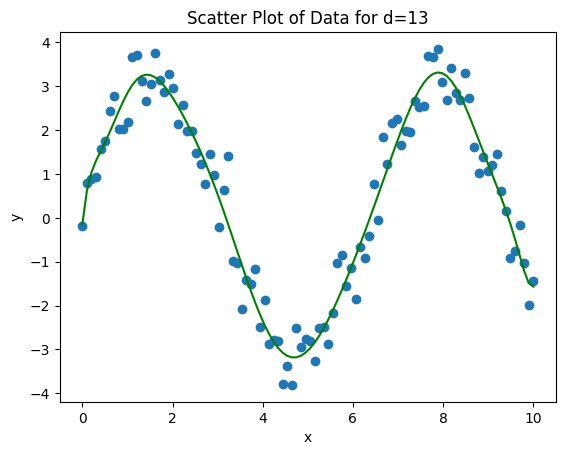

Polynomial 15: Weights: [ 1.57961279e-01  2.87371141e+00  8.29836841e-01 -5.97487064e-01
 -7.69210225e-01  1.41953926e-01  5.27806394e-01 -4.29914086e-01
  1.59751358e-01 -3.39107989e-02  4.18097434e-03 -2.50714252e-04
 -2.67928335e-06  1.47451095e-06 -8.98537355e-08  1.88220750e-09], MSE: 0.23198512445818278


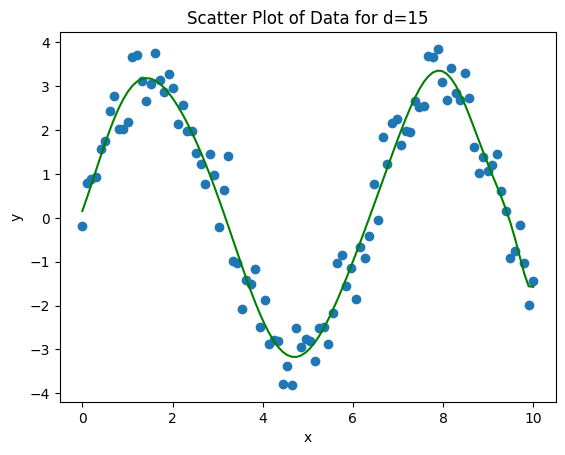

In [8]:
# Task 2 (continued)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees = [1, 3, 5, 7, 9, 11, 13, 15]
ws = []
MSEs = []

for i in degrees:
    z = extend_input_to_polynomial(x, i, False)

    reg = LinearRegression().fit(z, y)

    w = np.array([reg.intercept_] + list(reg.coef_))
    z = np.column_stack((np.ones(z.shape[0]), z))
    pred = np.dot(z, w)
    MSE = mean_squared_error(y, pred)

    print(f"Polynomial {i}: Weights: {w}, MSE: {MSE}")

    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x, pred, c="g", marker="")
    plt.title(f'Scatter Plot of Data for d={i}')
    plt.show()